In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# interpolation

In [2]:
files = {
    'fasttext': 'log/WRD_COS_interpolation_fasttext.csv',
    'fasttext_sw': 'log/WRD_COS_interpolation_fasttext_sw.csv',
    'glove42b': 'log/WRD_COS_interpolation_glove42b.csv',
    'glove840b':'log/WRD_COS_interpolation_glove840b.csv',
    'paragram': 'log/WRD_COS_interpolation_paragram.csv',
    'paranmt': 'log/WRD_COS_interpolation_paranmt.csv',
    'psl': 'log/WRD_COS_interpolation_psl.csv'
}

In [153]:
def plot_interp(k):
    df = pd.read_csv(files[k])
    c_arr = df['coef_C'].unique()
    p_arr = df['coef_P'].unique()
    interp_matrix = np.zeros((len(c_arr), len(p_arr)))

    for i, (c, p, l, m, r) in df.iterrows():
        ic = i // len(p_arr)
        ip = i % len(p_arr)
        interp_matrix[ic, ip] = m
    fig, ax = plt.subplots()
    m = np.min(interp_matrix)
    M = np.max(interp_matrix)
    d = (M - m) / 4
    levels = [m]
    cursor = m

    for l in range(3):
        for _ in range(3):
            cursor += d
            levels.append(cursor)
        d /= 4
    levels.append(M)
    
    im = ax.contourf(interp_matrix[:, :11], cmap='cool', levels=levels)
    ax.set_xticks(np.arange(11))
    ax.set_xticklabels(["{:.2f}".format(v) for v in p_arr[:11].tolist()], rotation=90)
    ax.set_yticks(np.arange(11))
    ax.set_yticklabels(["{:.1f}".format(v) for v in c_arr.tolist()])
    
    ind = np.unravel_index(np.argmax(interp_matrix, axis=None), interp_matrix.shape)
    print(ind)
    ax.scatter(ind[1], ind[0], c='r')

    
    ax.set_title("interpolation of WRD and COS with {} vector".format(k))
    fig.colorbar(im)

(1, 1)
(0, 0)
(0, 0)
(0, 0)
(3, 2)
(5, 3)
(3, 2)


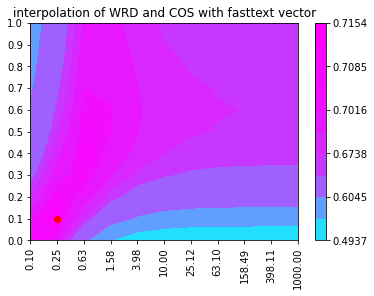

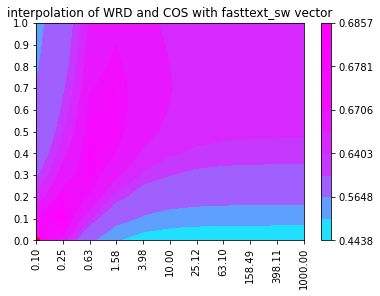

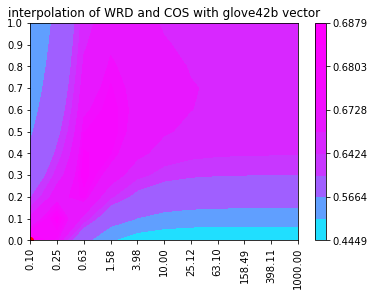

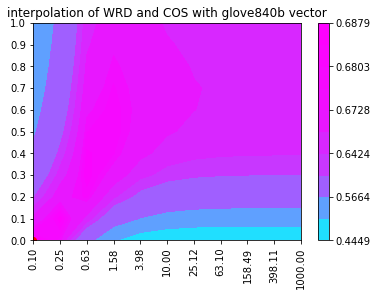

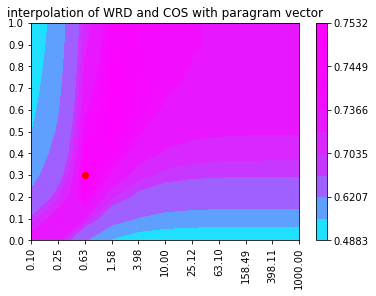

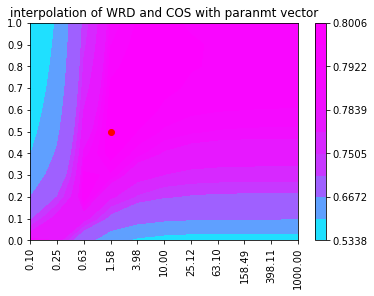

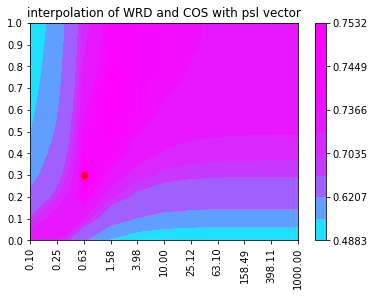

In [154]:
for k in files:
    plot_interp(k)

In [114]:
p_arr[:10]

array([1.00000000e-01, 2.51188643e-01, 6.30957344e-01, 1.58489319e+00,
       3.98107171e+00, 1.00000000e+01, 2.51188643e+01, 6.30957344e+01,
       1.58489319e+02, 3.98107171e+02])